# Práctica 9
# Perceptrón simple y Adaline

# Ejercicio 1

## Santiago Blasco Arnaiz

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#Tamaño de cada grupo
size = 1000
#Semilla para la generación aleatoria
seed = 0

### Generación del dataset

In [3]:
#Generamos un único conjunto de datos de 2000 muestras con 2 centros y dos atributos.
#Esto generará 1000 muestras con dos atributos alrededor de un centro y 1000 en el otro.
#Mediante el parámetro center_box ajustamos el rango en el que se generan las muestras para que estas
#sean directamente separables de forma lineal.
X,Y = make_blobs(n_samples=size*2, centers=2, n_features=2, random_state=seed,  center_box=(-20.0, 20.0))

In [4]:
X.shape,Y.shape

((2000, 2), (2000,))

In [5]:
X,Y

(array([[4.80231957, 2.35971553],
        [2.56446735, 7.26607793],
        [5.17575975, 2.15248098],
        ...,
        [1.78928521, 8.52111937],
        [1.66353495, 6.60893518],
        [0.31411653, 6.83118604]]),
 array([1, 0, 1, ..., 0, 0, 0]))

X = np.array([[1,1],
             [2,1],
             [2,2],
             [1,3],
             [-1,1],
             [0,2],
             [-1,3]])
Y = np.array([1,1,1,1,0,0,0])

In [6]:
dataRaw = np.insert(X,2,Y,axis=1)

data = pd.DataFrame(data=dataRaw, columns=["x1", "x2","Grupo"]).astype({"Grupo": int})
data

,x1,x2,Grupo
0,4.802320,2.359716,1
1,2.564467,7.266078,0
2,5.175760,2.152481,1
3,3.177411,8.672431,0
4,0.909411,7.750496,0
...,...,...,...
1995,1.135047,7.206227,0
1996,3.323502,1.210556,1
1997,1.789285,8.521119,0
1998,1.663535,6.608935,0


El dataset está compuesto por 2000 muestras, cada muestra tiene dos atributos, x1 y x2, son atributos numéricos continuos. Interpretaremos estos atributos como coordenadas de puntos en un espacio de dos dimensiones. Cada muestra pertenece a una clase (llamada grupo), es una clase con dos posibles valores de números enteros, 0 o 1. 1000 muestras pertenecen a una clase y 1000 a la otra.

### Normalización de los datos

In [7]:
#Normalizamos los datos para trabajar con ellos
X = MinMaxScaler().fit_transform(data[['x1', 'x2']])
#Extraemos los valores de la clase para cada muestra
g = data['Grupo'].values
X,g

(array([[0.65269348, 0.30520811],
        [0.4027733 , 0.6836715 ],
        [0.69439875, 0.28922261],
        ...,
        [0.31620205, 0.78048196],
        [0.30215844, 0.6329813 ],
        [0.1514573 , 0.65012513]]),
 array([1, 0, 1, ..., 0, 0, 0]))

In [8]:
#Índices de las muestras para los distintos valores de la clase utilizados para represetar
g0 = np.argwhere(g==0)
g1 = np.argwhere(g==1)

### Gráfico de puntos para representar las muestras pertenecientes a las dos clases

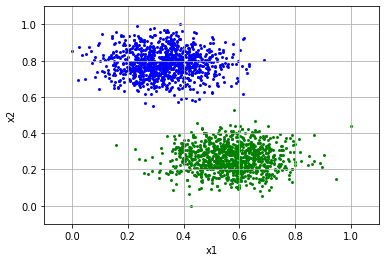

In [9]:
plt.scatter(X[g0,0], X[g0,1], c='blue',marker='.',s=15)
plt.scatter(X[g1,0], X[g1,1], c='green',marker='.',s=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.grid()
plt.show()

### Perceptrón simple

In [10]:
#Implementación de una red neuronal de perceptrón simple
class simple_perceptron():
    
    def __init__(self, n_inputs = 2, n_outputs = 1, W = None, b = None):
        
        #Tamaño de la capa de entrada
        self.n_inputs = n_inputs
        #Tamaño de la capa de salida
        self.n_outputs = n_outputs
        #Pesos
        self.W = W
        #Umbral
        self.b = b
        
        #Se encarga de inicializar los pesos si no son aportados como parámetro
        if self.W is None:
            self.W = np.random.rand(self.n_outputs, self.n_inputs) - 0.5
        
        #Se encarga de inicializar el umbral si no es aportado como parámetro
        if self.b is None:
            self.b = np.random.rand(self.n_outputs, 1) - 0.5
        
    #Devuelve la predicción realizada por la red neuronal en base a los datos pasados como parámetros
    def predict(self, x):
        return np.sign(self.W @ x.T + self.b).T.astype(int)
    
    #Entrena la red neuronal con los datos pasados como parámetros
    def train(self, X, D):
        
        #Cambiamos los valores de 0 de la clase por -1 para poder trabajar con ellos
        for i in range(D.size):
            if (D[i] == 0):
                D[i] = -1
        
        #Comprueba la coincidencia actual de la predicción con la salida deseada
        #Si no coinciden todas continua con el procedimiento
        if np.sum(self.predict(X) == D) != D.shape[0]:
            cont = True
            p = 0
            
            while cont:
                #Indice para recorrer cada muestra
                v = p % X.shape[0]
                #Muestra
                x = X[v].reshape(1, -1)
                #Imagen obtenida con la muestra
                y = self.predict(x)
                #Salida deseada
                d = D[v].reshape(1, -1)
                
                #Comparamos la salida deseada y la predicha
                if y != d:
                    #Modificamos los pesos y el umbral
                    self.W += d * x
                    self.b += d
                    
                    #Volvemos a comprobar la coincidencia entre la predicción y la salida desada para determinar
                    #si se detiene el algoritmo
                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        cont = False

                p += 1
        return
    
    #Devuelve los pesos y el umbral
    def get_params(self):
        return self.W, self.b

In [11]:
#Creamos el perceptron simple
ps = simple_perceptron(n_inputs = 2, n_outputs = 1)

In [12]:
#Lo entrenamos
ps.train(X,g.reshape(-1,1))

In [13]:
#Obtenemos los valores de los pesos y el umbral para poder representar la recta a partir de ellos
weights, bias = ps.get_params()
weights,bias

(array([[ 1.37635983, -3.45281747]]), array([[1.11018904]]))

### Separación lineal de ambos conjuntos generada por el perceptrón simple

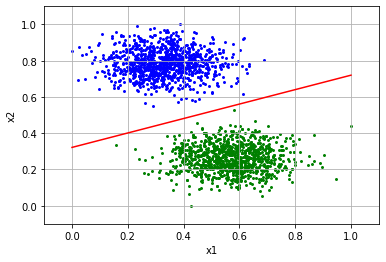

In [14]:
plt.scatter(X[g0,0], X[g0,1], c='blue',marker='.',s=15)
plt.scatter(X[g1,0], X[g1,1], c='green',marker='.',s=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.grid()

x1 = np.array([0.0, 1.0])
x2 = np.array([-bias[0,0]/weights[0,1],(-bias[0,0] - weights[0,0])/weights[0,1]])

plt.plot(x1, x2, c='red')

plt.show()